# data

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import StandardScaler

In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\bikes-day.csv"

In [3]:
# load the training data from glass data set
data = pd.read_csv(location)

In [4]:
data.shape

(731, 16)

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Simple linear regression

The plot reveals some degree of correlation between temperature and bike rentals, 

In [6]:
temps   = data['atemp'].values
rentals = data['cnt'].values / 1000

Text(0,0.5,'Bike Rentals in 1000s')

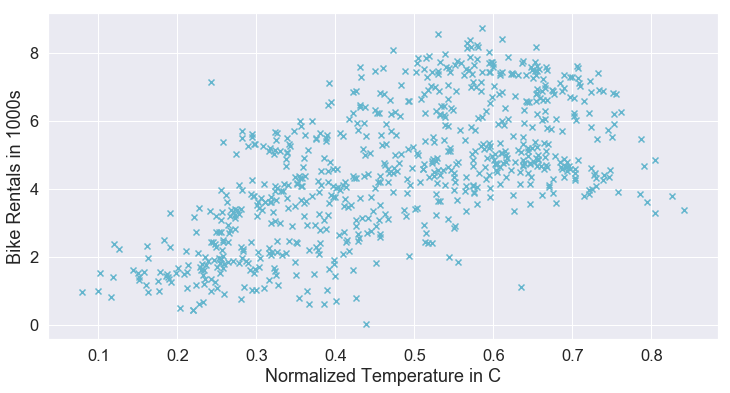

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(temps, rentals, marker='x', color='c')

plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

#### Define cost function of linear regression (MSE)

In [8]:
def compute_cost(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum(np.square(np.matmul(X, theta) - y)) / (2 * m)
    
    return J

a column of 1s is prepended onto the input data. This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later. This first value θ0 now behaves as a constant in the cost function.

In [9]:
# Initial coefficients = 0, 0 and initial cost (MSE)
theta = np.array([0, 0])

X = np.column_stack((np.ones(len(temps)), temps))
y = rentals

cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0 0]
cost: 12.018406441176468


We’ll now minimize the cost using the __gradient descent__ algorithm. 

Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a __learning rate__ multiplier __α__. 

In [10]:
def gradient_descent(X, y, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    updates theta by taking num_iters gradient steps with learning rate alpha
    """
    theta = np.array([0, 0])
    m = len(y)
    
    cost_history = [0] * iterations

    for iteration in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum( np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        theta = np.array([t0, t1])
        
        cost = compute_cost(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

$$
\theta = ({X}^\top X)^{-1} ({X}^\top y )
$$

In [11]:
iterations = 5000
alpha = 0.01

theta, cost_history = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [1.8864384  5.56165136]
cost: 1.1777073489348011


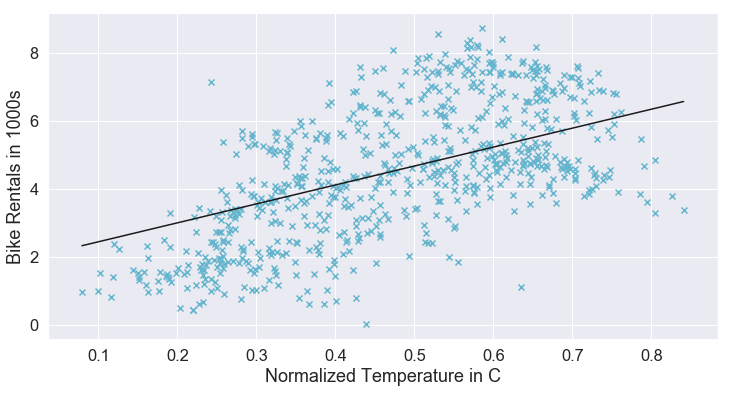

In [12]:
plt.figure(figsize=(12, 6))

plt.scatter(temps, rentals, marker='x', color='c')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

samples = np.linspace(min(temps), max(temps))

plt.plot(samples, theta[0] + theta[1] * samples, color='k');

A surface plot is a better illustration of how gradient descent approaches a global minimum, plotting the values for θ against their associated cost.

In [13]:
X.min(), X.max(), y.min(), y.max()

(0.0790696, 1.0, 0.022, 8.714)

In [14]:
# compute meshgrid
Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-10, 30, 50))

In [15]:
# get predictions
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

In [16]:
# And the prediction looks like ...
Zs

array([[106.69048223, 103.80357449, 100.95831607, ...,  16.02872575,
         15.09933572,  14.21159499],
       [100.8782163 ,  98.07033463,  95.30410228, ...,  13.93068514,
         13.08032117,  12.27160652],
       [ 95.23356834,  92.50471274,  89.81750646, ...,  12.0002625 ,
         11.2289246 ,  10.49923602],
       ...,
       [ 14.70901413,  15.53633171,  16.4052986 , ...,  98.61584755,
        101.40068284, 104.22716743],
       [ 16.77479301,  17.68113666,  18.62912962, ..., 104.39585175,
        107.25971311, 110.16522377],
       [ 19.00818986,  19.99355959,  21.02057862, ..., 110.34347393,
        113.28636135, 116.27089809]])

In [17]:
'''
'viridis'
'gray'
'cubehelix'
'RdBu'
'jet'
BrBG	brown, white, blue-green
PiYG	pink, white, yellow-green
PRGn	purple, white, green
PuOr	orange, white, purple
RdBu	red, white, blue
RdGy	red, white, gray
RdYlBu	red, yellow, blue
RdYlGn	red, yellow, green
Spectral	red, orange, yellow, green, blue
Blues	white to dark blue
BuGn	white, light blue, dark green
BuPu	white, light blue, dark purple
GnBu	white, light green, dark blue
Greens	white to dark green
Greys	white to black (not linear)
Oranges	white, orange, dark brown
OrRd	white, orange, dark red
PuBu	white, light purple, dark blue
PuBuGn	white, light purple, dark green
PuRd	white, light purple, dark red
Purples	white to dark purple
RdPu	white, pink, dark purple
Reds	white to dark red
YlGn	light yellow, dark green
YlGnBu	light yellow, light green, dark blue
YlOrBr	light yellow, orange, dark brown
YlOrRd	light yellow, orange, dark red
'''
cm = plt.cm.get_cmap('Purples')

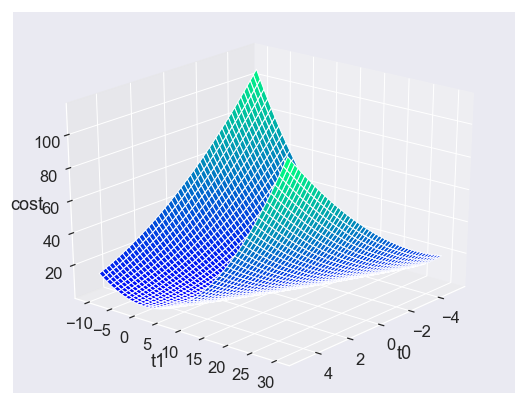

In [19]:
%matplotlib inline


fig = plt.figure(figsize=(9, 7))

ax = fig.gca(projection="3d")

ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')

ax.view_init(elev=25, azim=40)

ax.plot_surface(Xs, Ys, Zs, cmap='winter');

Finally, a countour plot reveals slices of that surface plot in 2D space, and can show the resulting θ values sitting exactly at the global minimum.

<IPython.core.display.Javascript object>


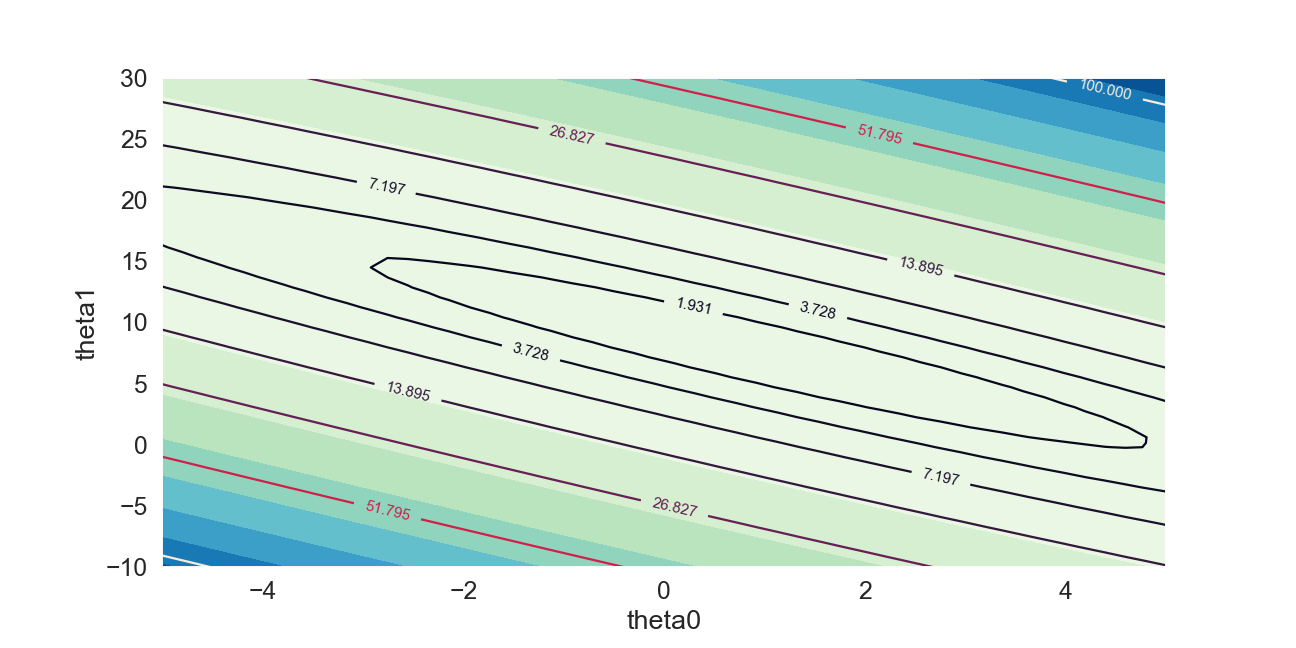

In [22]:
plt.figure(figsize=(12, 6))

cp = plt.contour(Xs, Ys, Zs, np.logspace(-2, 2, 15))

plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(Xs, Ys, Zs, cmap='GnBu')

plt.xlabel('theta0')
plt.ylabel('theta1');

In [93]:
# ax = plt.figure(figsize=(12, 6)).gca()
# ax.plot(theta[0], theta[1], 'r*')
# plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15));

# Multiple Linear Regression

First, we reload the data and add two more features, humidity and windspeed.

Before implementing gradient descent for multiple variables, we’ll also apply feature scaling to normalize feature values, preventing any one of them from disproportionately influencing the results, as well as helping gradient descent converge more quickly. In this case, each feature value is adjusted by subtracting the mean and dividing the result by the standard deviation of all values for that feature:

In [20]:
def feature_normalize(X):
    n_features = X.shape[1]
    means      = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs    = np.array([np.std(X[:,i])  for i in range(n_features)])
    
    normalized = (X - means) / stddevs

    return normalized

In [21]:
X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values / 1000

In [22]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

$$
β = ({X}^\top X)^{-1} ({X}^\top y )
$$

In [23]:
theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost 1.0058709247119846


In [24]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [ 4.50434884  1.22203893 -0.45083331 -0.34166068]
cost: 1.0058709247119848


The θ values and costs for each implementation are identical, so we can have a high degree of confidence they are correct.